# Assignment 1(due on 10/25)

## Student:唐正道（12331306），Gtihub：tzd19

## 批改人：吴昊天

## 得分：48/50

### PS1. Significant earthquakes since 2150 B.C.

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


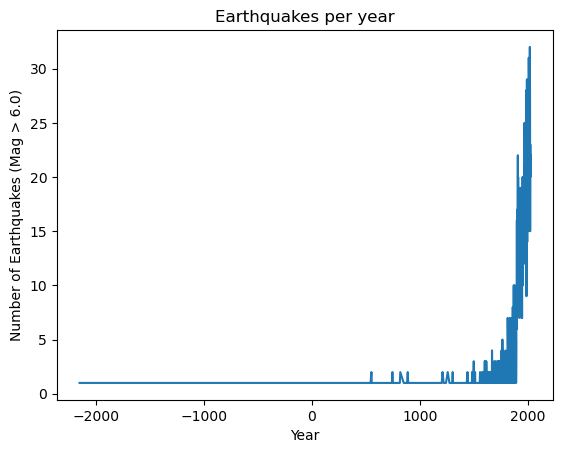

Country: CHINA, Total Earthquakes: 620, Largest Earthquake Date: 1668.0
Country: JAPAN, Total Earthquakes: 414, Largest Earthquake Date: 2011.0
Country: INDONESIA, Total Earthquakes: 411, Largest Earthquake Date: 2004.0
Country: IRAN, Total Earthquakes: 384, Largest Earthquake Date: 856.0
Country: TURKEY, Total Earthquakes: 335, Largest Earthquake Date: 1939.0
Country: ITALY, Total Earthquakes: 331, Largest Earthquake Date: 1915.0
Country: USA, Total Earthquakes: 276, Largest Earthquake Date: 1964.0
Country: GREECE, Total Earthquakes: 270, Largest Earthquake Date: 365.0
Country: PHILIPPINES, Total Earthquakes: 224, Largest Earthquake Date: 1897.0
Country: MEXICO, Total Earthquakes: 209, Largest Earthquake Date: 1899.0
Country: CHILE, Total Earthquakes: 198, Largest Earthquake Date: 1960.0
Country: PERU, Total Earthquakes: 190, Largest Earthquake Date: 1716.0
Country: RUSSIA, Total Earthquakes: 152, Largest Earthquake Date: 1952.0
Country: PAPUA NEW GUINEA, Total Earthquakes: 101, Large

In [2]:
import pandas as pd
df = pd.read_csv('earthquakes-2023-10-24_16-20-01_+0800.tsv',sep='\t')
df
country_deaths=df.groupby('Country')['Deaths'].sum()
country_deaths=country_deaths.sort_values(ascending=False)
print(country_deaths.head(10))
large_earthquakes=df[df['Mag']>6.0]
earthquakes_per_year=large_earthquakes['Year'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.plot(earthquakes_per_year.index,earthquakes_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes (Mag > 6.0)')
plt.title('Earthquakes per year')
plt.show()
def CountEq_LargestEq(country):### 代码结果正确，功能满足要求，分析内容合理

### 得分：/25
### --------------------------------------------------------------------------------------------
    country_data = df[df['Country'] == country]
    total_eq = country_data.shape[0]
    if total_eq > 0:
        largest_eq = country_data[country_data['Mag'] == country_data['Mag'].max()]
        if not largest_eq.empty:
            largest_eq_date = largest_eq['Year'].values[0]
        else:
            largest_eq_date = "Data not available"
    else:
        largest_eq_date = "No data available"
    
    return total_eq, largest_eq_date
results = {}
for country in df['Country'].unique():
    total_eq, largest_eq_date = CountEq_LargestEq(country)
    results[country] = (total_eq, largest_eq_date)
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
for country, (total_eq, largest_eq_date) in sorted_results:
    print(f"Country: {country}, Total Earthquakes: {total_eq}, Largest Earthquake Date: {largest_eq_date}")

(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

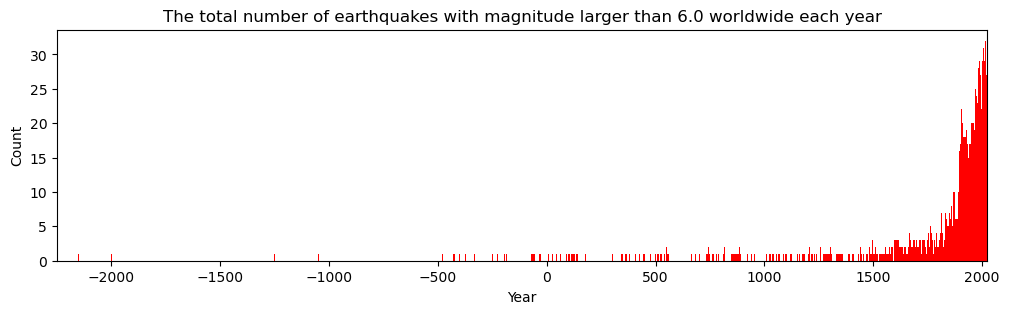

In [6]:
Sig_Eqs_2 = df.loc[df['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])

### 代码结果基本正确，功能满足要求，分析内容合理。
### 1.1中，题干要求将数据集命名为Sig_Eqs。
### 1.2中，注意在绘制6级以上的地震次数图件时，部分年份没有记录地震数据或没有6级以上的地震，如果直接绘制，图件容易有歧义。
### 助教提供给您提供了绘图的参考代码，给您参考。
### 得分：24/25
### --------------------------------------------------------------------------------------------

### PS2. Wind speed in Shenzhen during the past 10 years

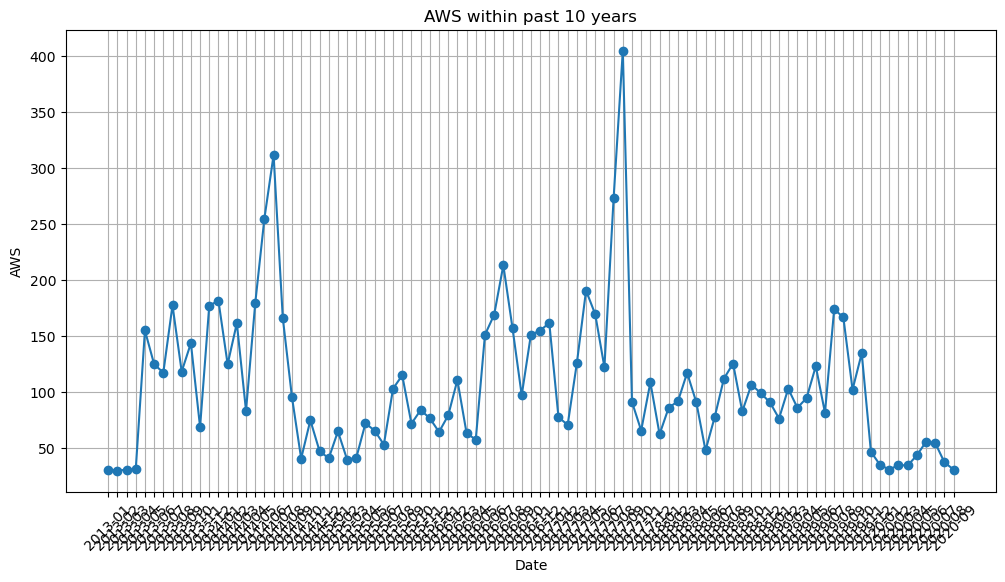

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:2281305.csv', low_memory=False)
data
data['DATE'] = pd.to_datetime(data['DATE'])
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['WND'] = data['WND'].str.split(',').str[3].astype(float)
current_year = pd.Timestamp.now().year
data_last_10_years = data[data['Year'] >= current_year - 10]
result = data_last_10_years.groupby(['Year', 'Month'])['WND'].mean().reset_index()
result['Year-Month'] = result['Year'].astype(str) + '-' + result['Month'].astype(str).str.zfill(2)
result = result.sort_values('Year-Month')
result = result[['Year-Month', 'WND']].reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.plot(result['Year-Month'], result['WND'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('AWS')
plt.title('AWS within past 10 years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
# 以下是助教提供参考代码，来源：冯汇然同学

# Read the wind speed data into a DataFrame
Ws_SZ = pd.read_csv('2281305.csv',encoding='utf-8')

# Only choose 'DATE' and 'WND'
Ws_SZ = Ws_SZ[['DATE', 'WND']]

# Split 'WND' into 'direction_angle', 'direction_quality', 'type', 'speed' and 'speed_quality'
Ws_SZ[['direction_angle', 'direction_quality', 'type', 'speed', 'speed_quality']] = Ws_SZ['WND'].str.split(',', expand=True)

# Split 'DATE' into 'yyyymm' and 'ddHHMMSS'
Ws_SZ[['yyyy', 'mm', 'ddHHMMSS']] = Ws_SZ['DATE'].str.split('-', expand=True)

# yyyy + mm
Ws_SZ['yyyymm'] = Ws_SZ['yyyy'].astype(str) + '-' + Ws_SZ['mm'].astype(str)

# Show the Data Frame
# Ws_SZ

C:\Users\Wu\AppData\Local\Temp\ipykernel_12600\1733529788.py:4: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Ws_SZ = pd.read_csv('2281305.csv',encoding='utf-8')


In [12]:
## Quality control

# 1. Drop direction_angle == 999
Ws_SZ = Ws_SZ[Ws_SZ['direction_angle'] != '999']

# 2. Drop direction_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['direction_quality'].isin(['2', '3', '6', '7'])]

# 3. Drop type == 9
Ws_SZ = Ws_SZ[Ws_SZ['type'] != '9']

# 4. Drop speed == 9999
Ws_SZ = Ws_SZ[Ws_SZ['speed'] != '999.9']
Ws_SZ['speed'] = (Ws_SZ['speed'].astype(float))/10

# 5. Drop speed_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['speed_quality'].isin(['2', '3', '6', '7'])]

## Show
# Ws_SZ

<Axes: title={'center': 'Monthly Wind Speed in ShenZhen Site'}, xlabel='Month', ylabel='Wind Speed (m/s)'>

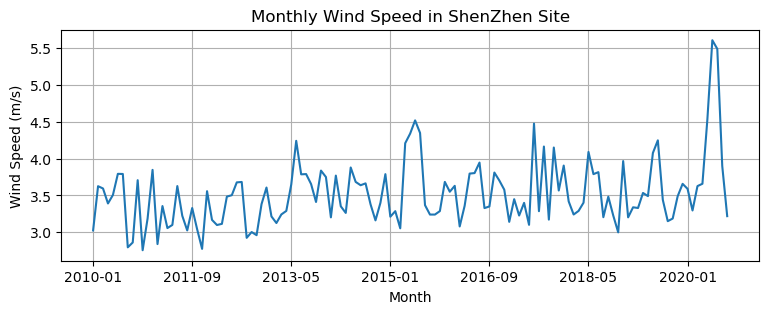

In [13]:
# Plot
Ws_SZ.groupby('yyyymm')['speed'].mean().plot(figsize=(9,3),
                                             title='Monthly Wind Speed in ShenZhen Site',
                                             ylabel='Wind Speed (m/s)',
                                             xlabel='Month',
                                             grid=True)

### 数据预处理有误，并且存在未剔除的值。
### 导致在计算月平均风速时，存在理论与事实上并不可能存在的数值。
### 比如400m/s月平均风速。
### 助教提供参考代码，来源：冯汇然同学
### 得分 9/10
### ---------------------------------------------------------------------------------------------

### PS3. Explore a data set

d:\software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38081 (\N{CJK UNIFIED IDEOGRAPH-94C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\software\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


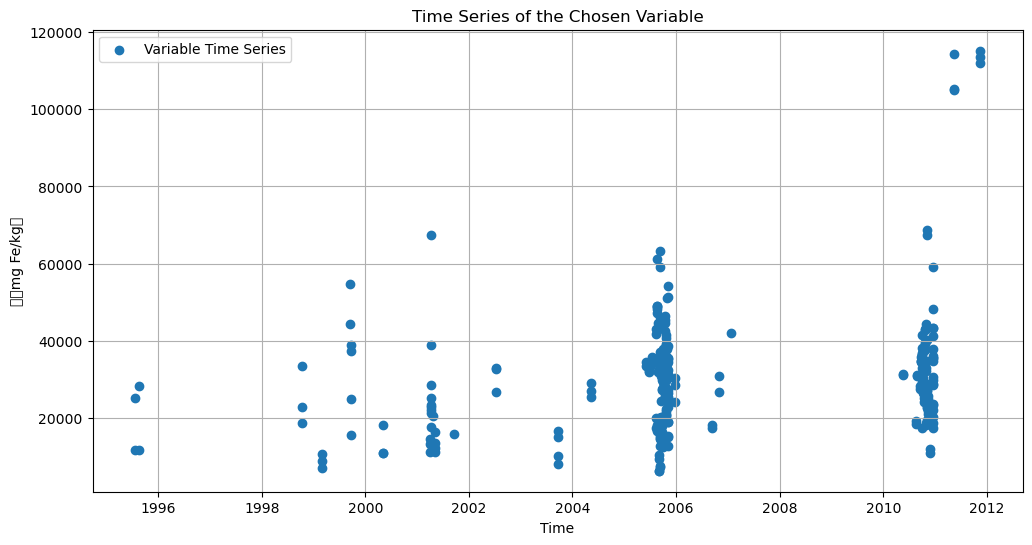

Summary Statistics: count       286.000000
mean      30708.888112
std       16401.434289
min        6287.000000
25%       20476.250000
50%       29275.000000
75%       35640.750000
max      115205.000000
Name: 铁（mg Fe/kg）, dtype: float64
Max Value: 115205.0
Min Value: 6287.0
Mean Value: 30708.88811188811
Median Value: 29275.0
Standard Deviation: 16401.43428905882


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('DP_SG_soil_environmental_elements1.xls')
data
variable_data = data['铁（mg Fe/kg）']
variable_data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.scatter(data.index, variable_data, label='Variable Time Series')
plt.xlabel('Time')
plt.ylabel('铁（mg Fe/kg）')
plt.title('Time Series of the Chosen Variable')
plt.grid(True)
plt.legend()
plt.show()

summary_stats = variable_data.describe()
max_value = variable_data.max()
min_value = variable_data.min()
mean_value = variable_data.mean()
median_value = variable_data.median()
std_deviation = variable_data.std()
print("Summary Statistics:", summary_stats)
print("Max Value:", max_value)
print("Min Value:", min_value)
print("Mean Value:", mean_value)
print("Median Value:", median_value)
print("Standard Deviation:", std_deviation)

### 代码运行结果正确，绘制图件正确，统计检查正确。
### 得分 15/15
### ---------------------------------------------------------------------------------------------